<a href="https://colab.research.google.com/github/Zuhair0000/ARIMA-Temp/blob/main/temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd

# **Load Dataset**

In [3]:
df = pd.read_csv("Electric_Production.csv")

In [4]:
df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [11]:
df["DATE"] = pd.to_datetime(df["DATE"])
df.set_index("DATE", inplace=True)

<Axes: xlabel='DATE'>

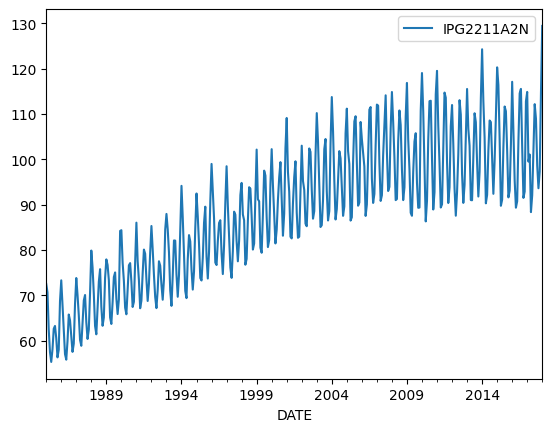

In [12]:
df.plot()

# **Train-Test Split**

In [13]:
train = df.iloc[:int(len(df)*0.8)]
test = df.iloc[int(len(df)*0.8):]

# **ARIMA**

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:
forecast = model_fit.forecast(steps=len(test))

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test, forecast)

5.679650932722209